# PCA


In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 读取数据
data = pd.read_csv('/local/data1/honzh073/local_repository/FL/code/0_stats&pyradiomics/clean_18_types.csv')

# 提取特征和标签
X = data.drop('Type', axis=1)  # 特征
y = data['Type']  # 标签

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 创建PCA模型并拟合数据
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 输出主成分的方差解释比例
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# 选择要保留的主成分数量，可以根据解释比例来确定
num_components_to_keep = 2
X_pca_selected = X_pca[:, :num_components_to_keep]

# 将主成分的数据与标签合并
pca_data = pd.DataFrame(data=X_pca_selected, columns=[f'PC{i+1}' for i in range(num_components_to_keep)])
pca_data['Type'] = y

# 输出结果
print("\nPCA Data:")
print(pca_data.head())


Explained Variance Ratio:
[6.39874866e-01 1.46475208e-01 1.20994068e-01 3.89007852e-02
 2.36064856e-02 1.46180638e-02 6.71858582e-03 3.77987049e-03
 1.76841765e-03 1.33165243e-03 5.66370758e-04 4.47729309e-04
 3.57428992e-04 2.19258364e-04 1.46724226e-04 9.63525332e-05
 6.81070578e-05 2.54243670e-05 3.87369435e-06 6.18983086e-07
 1.00703681e-07 8.11804097e-09 1.31352880e-10 1.47815477e-14
 8.70957102e-16 3.31144626e-21 2.52107942e-22 1.05756185e-26
 3.29654473e-33 3.29654473e-33 3.29654473e-33 3.29654473e-33
 3.29654473e-33 3.29654473e-33 3.29654473e-33 3.29654473e-33
 3.29654473e-33 3.29654473e-33 3.29654473e-33 3.27180824e-33
 1.68625048e-33]

PCA Data:
        PC1       PC2  Type
0 -4.341848  0.196884     0
1 -5.009587  7.163849     0
2 -2.214139  1.847553     0
3  3.802107  0.067417     0
4  8.267443  0.677489     0


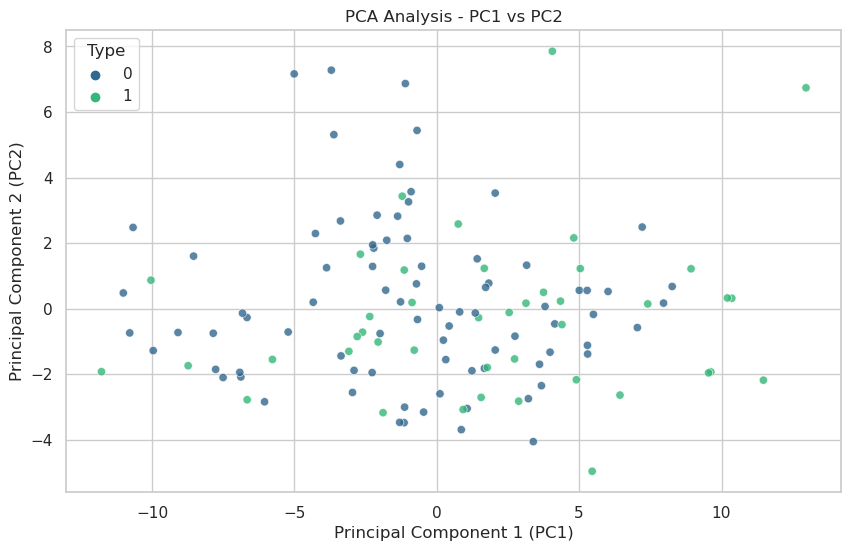

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置Seaborn风格
sns.set(style="whitegrid")

# 创建散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Type', data=pca_data, palette='viridis', alpha=0.8)

# 添加标题和标签
plt.title('PCA Analysis - PC1 vs PC2')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')

# 显示图例
plt.legend(title='Type')

# 显示图形
plt.show()
